<a href="https://colab.research.google.com/github/BriceJurban/GChem/blob/main/Enzyme_Kinetics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
# Dummy enzyme kinetics data (substrate concentration vs reaction rate)
substrate_concentration = np.array([0.2, 1, 2, 5, 10, 20])  # [S]
reaction_rate = np.array([0.911034127, 20.55600322, 40.30090027, 56.78465931, 64.4456705, 72.40295959])  # v

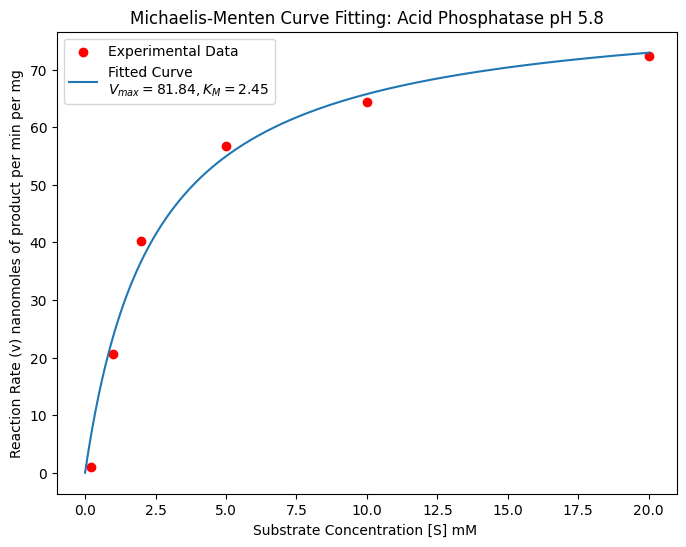

In [3]:
# Michaelis-Menten equation
def michaelis_menten(S, V_max, K_M):
    return (V_max * S) / (K_M + S)

# Fit the curve
popt, pcov = curve_fit(michaelis_menten, substrate_concentration, reaction_rate)
V_max_fitted, K_M_fitted = popt

# Plotting the data and the fitted curve
plt.figure(figsize=(8, 6))
plt.scatter(substrate_concentration, reaction_rate, color='red', label='Experimental Data')
plt.plot(np.linspace(0, max(substrate_concentration), 500),
         michaelis_menten(np.linspace(0, max(substrate_concentration), 500), *popt),
         label='Fitted Curve\n$V_{max}=%.2f, K_M=%.2f$' % tuple(popt))
plt.xlabel('Substrate Concentration [S] mM ')
plt.ylabel('Reaction Rate (v) nanomoles of product per min per mg')
plt.legend()
plt.title('Michaelis-Menten Curve Fitting: Acid Phosphatase pH 5.8')
plt.show()